**Purpose**
The purpose of the following code is to use RNAfold to examine the reproducability of the RNA secondary structures discussed in _Computational design and experimental validation of oligonucleotide-sensing allosteric ribozymes_ by Robert Penchovsky & Ronald R Breaker (_Nature Biotechnology_, 2005). 

The following code imports the subprocess module, which will allow the use of RNAfold from within my python script. Four DNA sequences matching the RNA sequences from the figure specified in each variable's name were manually copied from the paper's PDF on ApE (ApE makes it easy to track the coordinate of each nucleotide and helps me avoid making mistakes, but it does not allow the 'U' character). Then, a list of these sequences is generated. 

In [ ]:
import subprocess

fig2adna = 'GGGCGACCCTGATGAGCTTGAGTTTAGCTCGTCACTGTCCAGGTTCAATCAGGCGAAACGGTGAAAGCCGTAGGTTGCCC'
fig4adna = 'GGCAGGTACATACAGCTGATGAGTCCCAAATAGGACGAAACGCGACACACACCACTAAACCGTGCAGTGTTTTGCGTCCTGTATTCCACTGC'
fig5adna = 'GGGCGACCCTGATGAGCTTGGTTTAGTATTTACAGCTCCATACATGAGGTGTTATCCCTATGCAAGTTCGATCAGGCGAAACGGTGAAAGCCGTAGGTTGCCCAGAGACAAT'
fig6adna = 'GGGCGACCCTGATGAGCTTGGTTGAGTATTTACAGCTCCATACATGAGGTGTTCTCCCTACGCAAGTTCGATCAGGCGAAACGGTGAAAGCCGTAGGTTGCCC'
list_of_dna_seqs = [fig2adna, fig4adna, fig5adna, fig6adna]

An empty list to be populated with the RNA version of each DNA sequence from list_of_dna_seqs is defined. Then, for each base in each DNA sequence, the base is copied to a corresponding string in list_of_rna_seqs unless the base is a 'T', in which case it is replaced with a U then added to the corresponding list_of_rna_seqs string. 

In [ ]:
list_of_rna_seqs = ['', '', '', '']

for seq in list_of_dna_seqs:
    seq_index = list_of_dna_seqs.index(seq)
    for base in seq:
        if base == 'T':
            added_base = 'U'
        else:
            added_base = base
        list_of_rna_seqs[seq_index] += added_base

The following method returns a constraint string given a sequence and coordinates for the sites to be constrained from binding intramolecularly. 

'seq' is a string containing the nucleotide sequence of interest.
'c1' is the coordinate of the first nucleotide (5' end) one of two possible oligo binding sites (OBS) or one of two possible sites to be constrained from participating in intramolecular bonding. 
'c2' is the coordinate of the last nucleotide (3' end) of one of two possible OBS's corresponding to 'c1'. 
'c3' and 'c4' fulfill identical roles as 'c1' and 'c2' but refer to a second OBS. If there is only one OBS, then 'c3' and 'c4' should be set equal to zero. 

In the first line, the output_string variable to be returned is as a default defined as an empty string. If the c3 or c4 arguments are set to zero, then a 'for' loop is started in which an 'x' or '.' is added to output_string depending on whether the index of the base in seq being iterated over is within or outside of the 'c1,c2' coordinates, respectively. 
If c3 or c4 are not zero, then it is assumed that one additional OBS exists within the string and a similar 'for' loop is started in which 'x' or '.' is added to 'output_string' corresponding to each base in seq's position either within or outside of the coordinates defined by (c1,c2) and (c3,c4). 

In [ ]:
def constrain(seq, c1, c2,c3,c4):
    output_string = ''
    if c3 == 0 or c4 == 0:
        for base in range(0,len(seq)):
            if base > (c1-2) and base < c2:
                constrained_base = 'x'
                output_string += constrained_base
            else:
                constrained_base = '.'
                output_string += constrained_base
        return(output_string)
    else:
        for base in range(0,len(seq)):
            if (base > (c1-2) and base < c2) or (base > (c3-2) and base < c4):
                constrained_base = 'x'
                output_string += constrained_base
            else:
                constrained_base = '.'
                output_string += constrained_base
    return(output_string)

The first four lines create variable names for each member of the list_of_rna_seqs previously defined. The next 8 variables defined use the 4 RNA sequences and the 'constrain' method to generate strings to input into the 'RNAfold -C' command and generate RNA folding plots that account for the desired constraints. 

The print statements that follow generate labels and their corresponding constraint strings (the strings composed of '.''s and 'x''s). 

These constraint strings are then included in the 'seqs' variable along with their corresponding RNA sequence in the subprocess.run function, where subprocess is used to run RNAfold in order to generate folding plots from our sequences and constraint strings. Note that the first sets of seqs do not include constraints, as the goal for the first iteration of RNAfold is to determine the folding structures of each RNA sequence without constraints. 

With the method described above, folding plots are generated for every combination of constraints possible with the single OBS sites in fig2aRNA and fig4aRNA (obs1 bound or unbound) and in fig5arna and fig6arna (obs1 bound or unbound, obs2 bound or unbound). 

In [ ]:
fig2arna = list_of_rna_seqs[0]
fig4arna = list_of_rna_seqs[1]
fig5arna = list_of_rna_seqs[2]
fig6arna = list_of_rna_seqs[3]

yes1const = constrain(fig2arna,26,47,0,0)
not1const = constrain(fig4arna,44,66,0,0)
and1const_tf = constrain(fig5arna, 30,45,0,0)
and1const_ft = constrain(fig5arna, 49,64,0,0)
and1const_tt = constrain(fig5arna, 30,45,49,64)
or1const_tf = constrain(fig6arna, 27,46,0,0)
or1const_ft = constrain(fig6arna, 47,66,0,0)
or1const_tt = constrain(fig6arna, 27,46,47,66)

print('yes1const')
print(yes1const)
print('not1const')
print(not1const)
print('and1const_tf')
print(and1const_tf)
print('and1const_ft')
print(and1const_ft)
print('and1const_tt')
print(and1const_tt)
print('or1const_tf')
print(or1const_tf)
print('or1const_ft')
print(or1const_ft)
print('or1const_tt')
print(or1const_tt)



seqs = \
""" 
>seq1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
>seq2 
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
>seq3
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
>seq4
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
"""

a = subprocess.run([r'C:\Users\ehurt\Desktop\RNAfold'], input=bytes(seqs, 'ascii'),stdout = subprocess.PIPE, stderr = subprocess.PIPE)
print(a.stdout.decode())

seqs = \
""" 
>seq12
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
.........................xxxxxxxxxxxxxxxxxxxxxx.................................

"""
b = subprocess.run([r'C:\Users\ehurt\Desktop\RNAfold', '-C'], input=bytes(seqs, 'ascii'),stdout = subprocess.PIPE, stderr = subprocess.PIPE)
print(b.stdout.decode())

seqs = \
""" 
>seq22
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
...........................................xxxxxxxxxxxxxxxxxxxxxxx..........................

"""
c = subprocess.run([r'C:\Users\ehurt\Desktop\RNAfold', '-C'], input=bytes(seqs, 'ascii'),stdout = subprocess.PIPE, stderr = subprocess.PIPE)
print(c.stdout.decode())

seqs = \
""" 
>seq31
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
.............................xxxxxxxxxxxxxxxx...................................................................

"""
d = subprocess.run([r'C:\Users\ehurt\Desktop\RNAfold', '-C'], input=bytes(seqs, 'ascii'),stdout = subprocess.PIPE, stderr = subprocess.PIPE)
print(d.stdout.decode())

seqs = \
""" 
>seq32
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
................................................xxxxxxxxxxxxxxxx................................................

"""
e = subprocess.run([r'C:\Users\ehurt\Desktop\RNAfold', '-C'], input=bytes(seqs, 'ascii'),stdout = subprocess.PIPE, stderr = subprocess.PIPE)
print(e.stdout.decode())

seqs = \
""" 
>seq33
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
.............................xxxxxxxxxxxxxxxx...xxxxxxxxxxxxxxxx................................................

"""
f = subprocess.run([r'C:\Users\ehurt\Desktop\RNAfold', '-C'], input=bytes(seqs, 'ascii'),stdout = subprocess.PIPE, stderr = subprocess.PIPE)
print(f.stdout.decode())

seqs = \
""" 
>seq41
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
..........................xxxxxxxxxxxxxxxxxxxx.........................................................

"""
g = subprocess.run([r'C:\Users\ehurt\Desktop\RNAfold', '-C'], input=bytes(seqs, 'ascii'),stdout = subprocess.PIPE, stderr = subprocess.PIPE)
print(g.stdout.decode())

seqs = \
""" 
>seq42
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
..............................................xxxxxxxxxxxxxxxxxxxx.....................................

"""
h = subprocess.run([r'C:\Users\ehurt\Desktop\RNAfold', '-C'], input=bytes(seqs, 'ascii'),stdout = subprocess.PIPE, stderr = subprocess.PIPE)
print(h.stdout.decode())

seqs = \
""" 
>seq43
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
..........................xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx.....................................

"""
i = subprocess.run([r'C:\Users\ehurt\Desktop\RNAfold', '-C'], input=bytes(seqs, 'ascii'),stdout = subprocess.PIPE, stderr = subprocess.PIPE)
print(i.stdout.decode())

**Results**

The table below contains the name of each molecular switch along with a column containing the start and end coordinate of the first and last nucleotide of the first and second obs sites. The red coordinates represent the start and end coordinates of each strand of nucleotides comprising the red stem structures required for a 'True' output. 

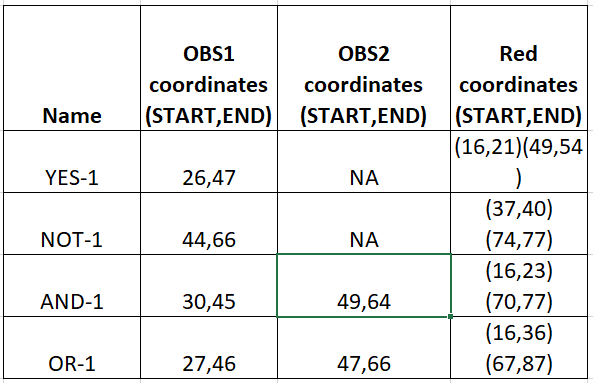

**Truth Table Summary**
The truth table below demonstrates that the OR-1 and AND-1 molecular switch outcomes simulated here with the default settings of RNAfold did not perfectly align with the paper's results. As the table demonstrates, the AND-1 did not produce the stem region labelled red in the paper with any of the constraints, including when both OBS sites were bound (as would be expected with an AND gate). Additionally, while the OR-1 switch produced the 'true' stem loop if at least one of the sites were bound (as expected), when OBS-1 was bound, RNAfold predicted a structure  that only contained the stem loop but included an extended region of double-stranded binding as shown in the corresponding image below within the set of plots generated by RNAfold. It is not clear to me whether the red-labelled stem loop of interest being contained within the molecular switch's structure is sufficient for a 'true' output, so RNAfold on default thermodynamic settings only loosely recapitulated the paper's expected outputs. 

**Analysis of Results**
One hypothesis for explaining the differences between outputs shown in the paper and those shown here is that the paper operates at 23 degrees Celsius, while RNAfold assumes a default temperature of 37 degrees C. At higher temperatures, according to the equation for Gibbs free energy (delta(G)) = delta(H) - T*(delta(S)), the entropic cost of a given conformation will be multiplied by a higher factor. Thus, it is possible that the conformations predicted in the paper are too entropically-costly at 37 degrees C for the enthalpy change of hydrogen bonding between the bases at the predicted conformation to overcome. More simply, 37 degrees may favor different conformations than those favored at 27 degrees. 

Additionally, the algorithm used in the paper eliminates dominant structure that are not preserved in the range from 20 to 40 degrees C, which is not accounted for by RNAfold alone as used for lab 5. Therefore, it seems possible that the dominant structures produced by RNAfold here are structures that are not dominant at 23 degrees and would therefore have been eliminated by the methods of the Penchovsky and Breaker paper. 

Nevertheless, if we take this crude analysis performed only with RNAfold at face value, **the AND-1 and OR-1 riboswitches do not work as the paper claims.**

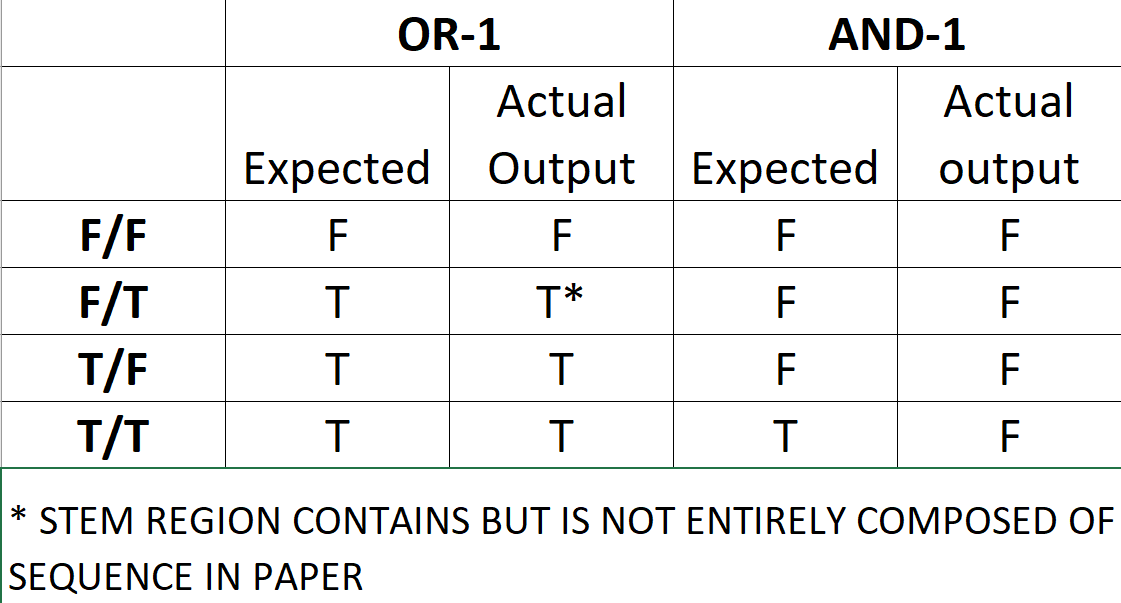

YES-1 unbound (does not agree with paper)

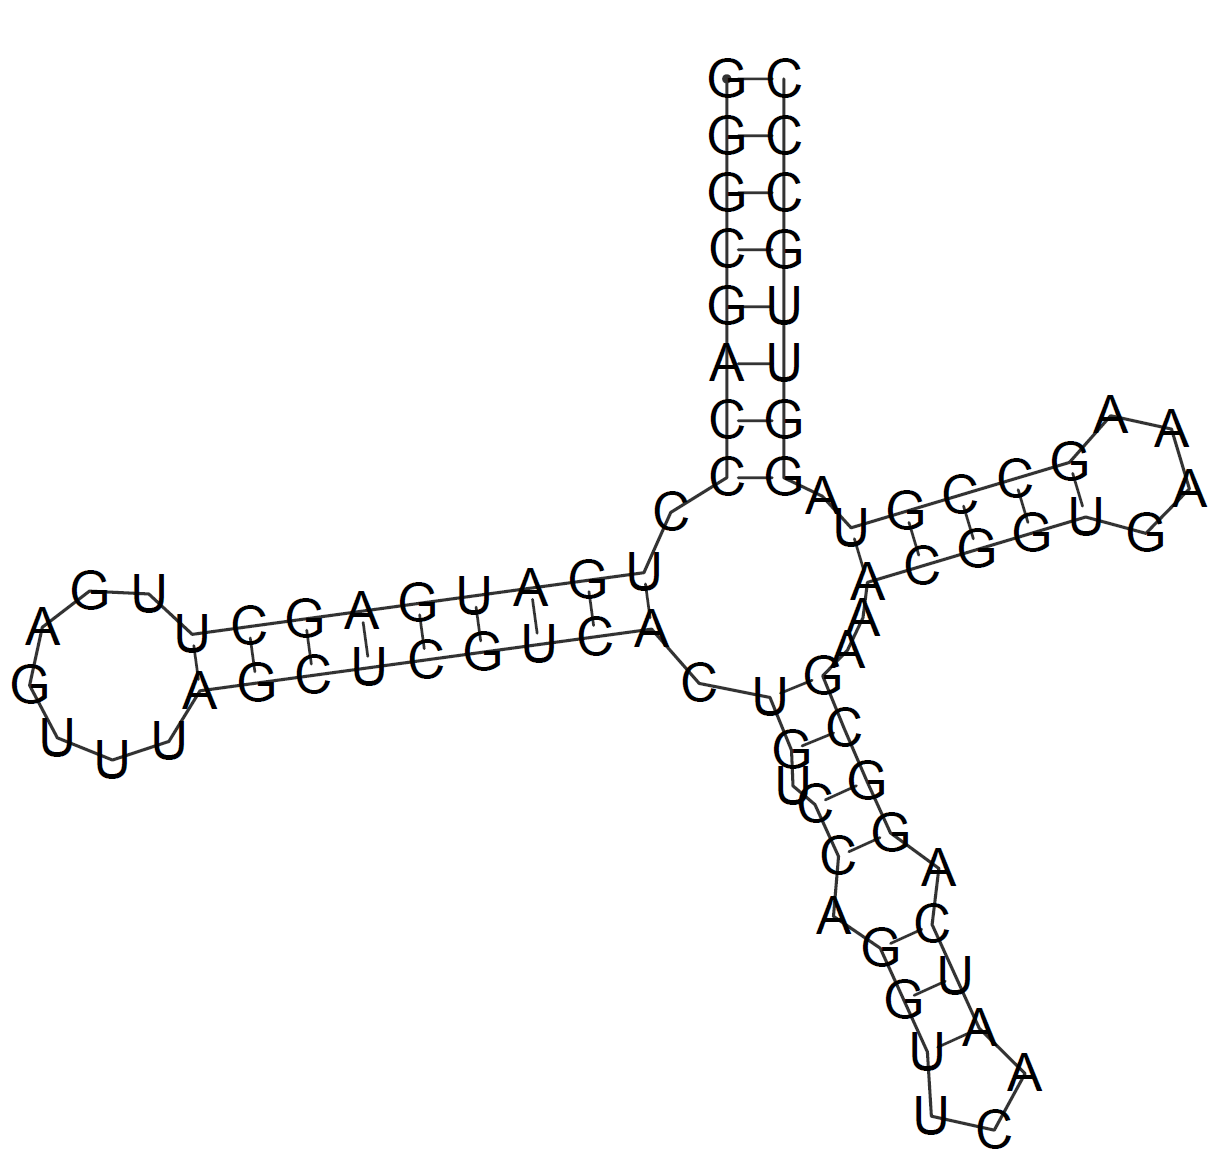

YES-2 bound (agrees with paper)

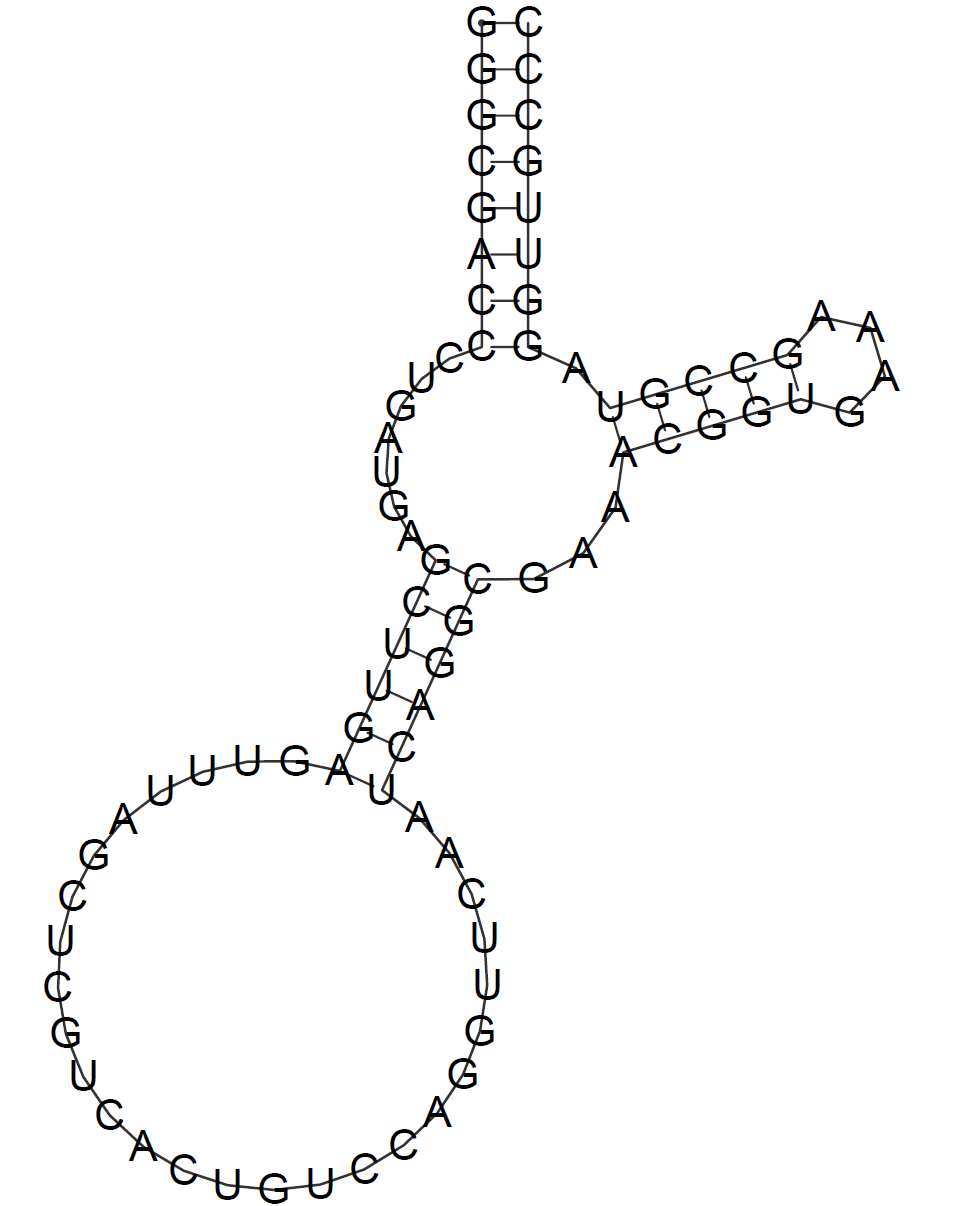

NOT-1 unbound (agrees with paper)

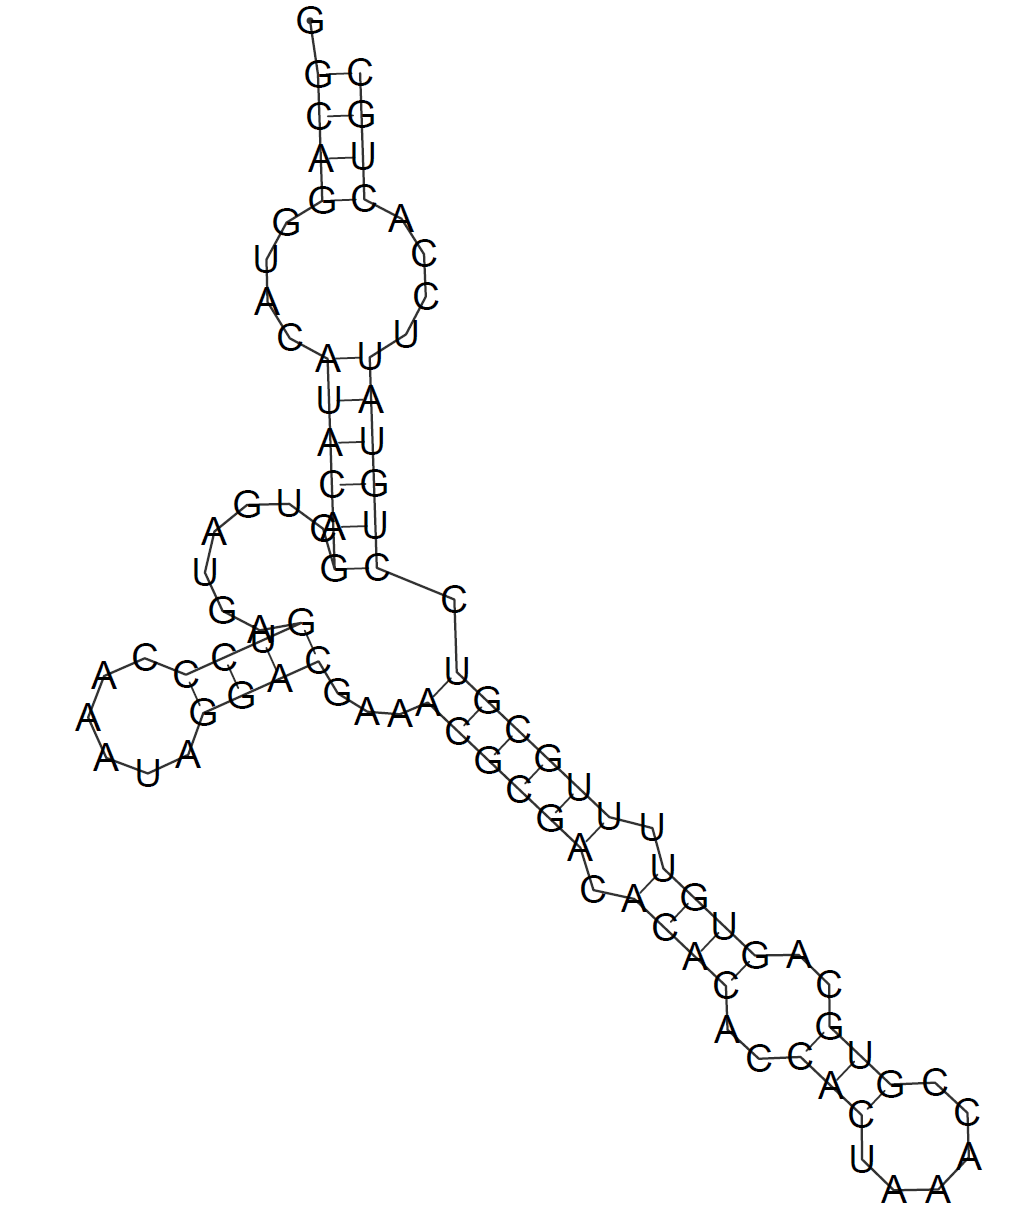

NOT-1 bound (agrees with paper)

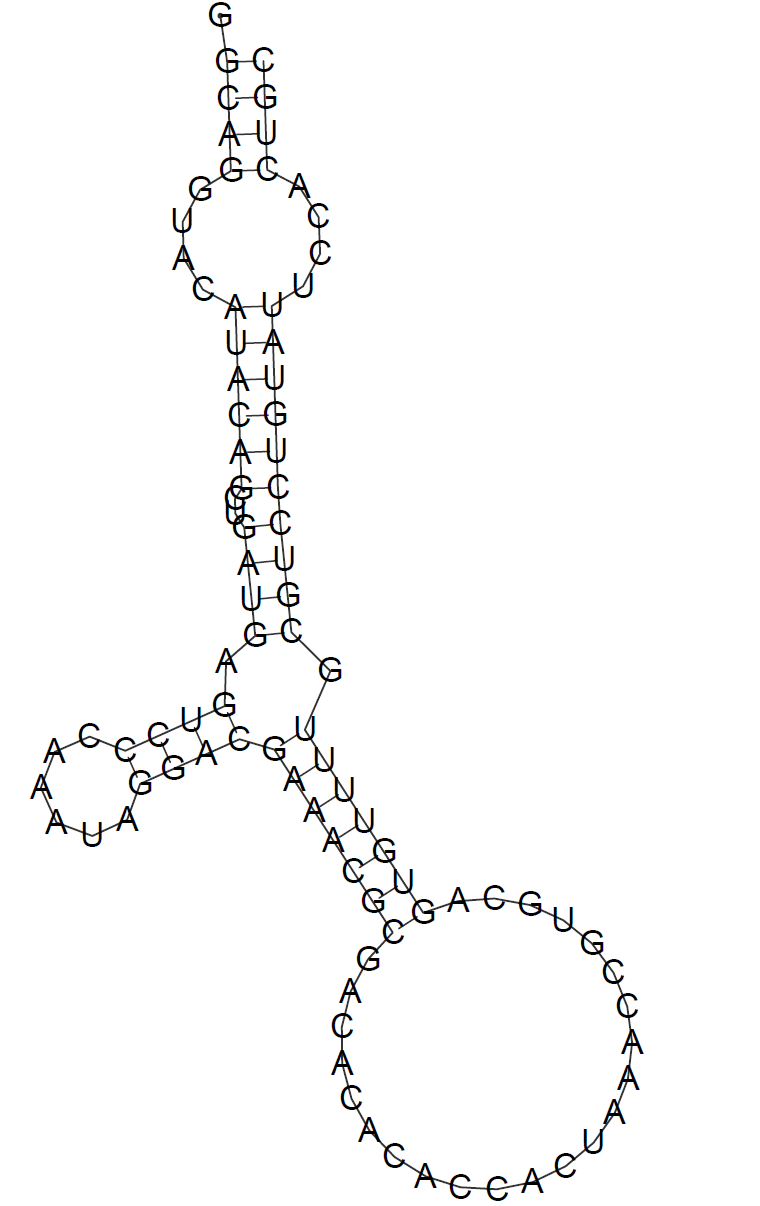

AND-1 unbound (agrees with paper)

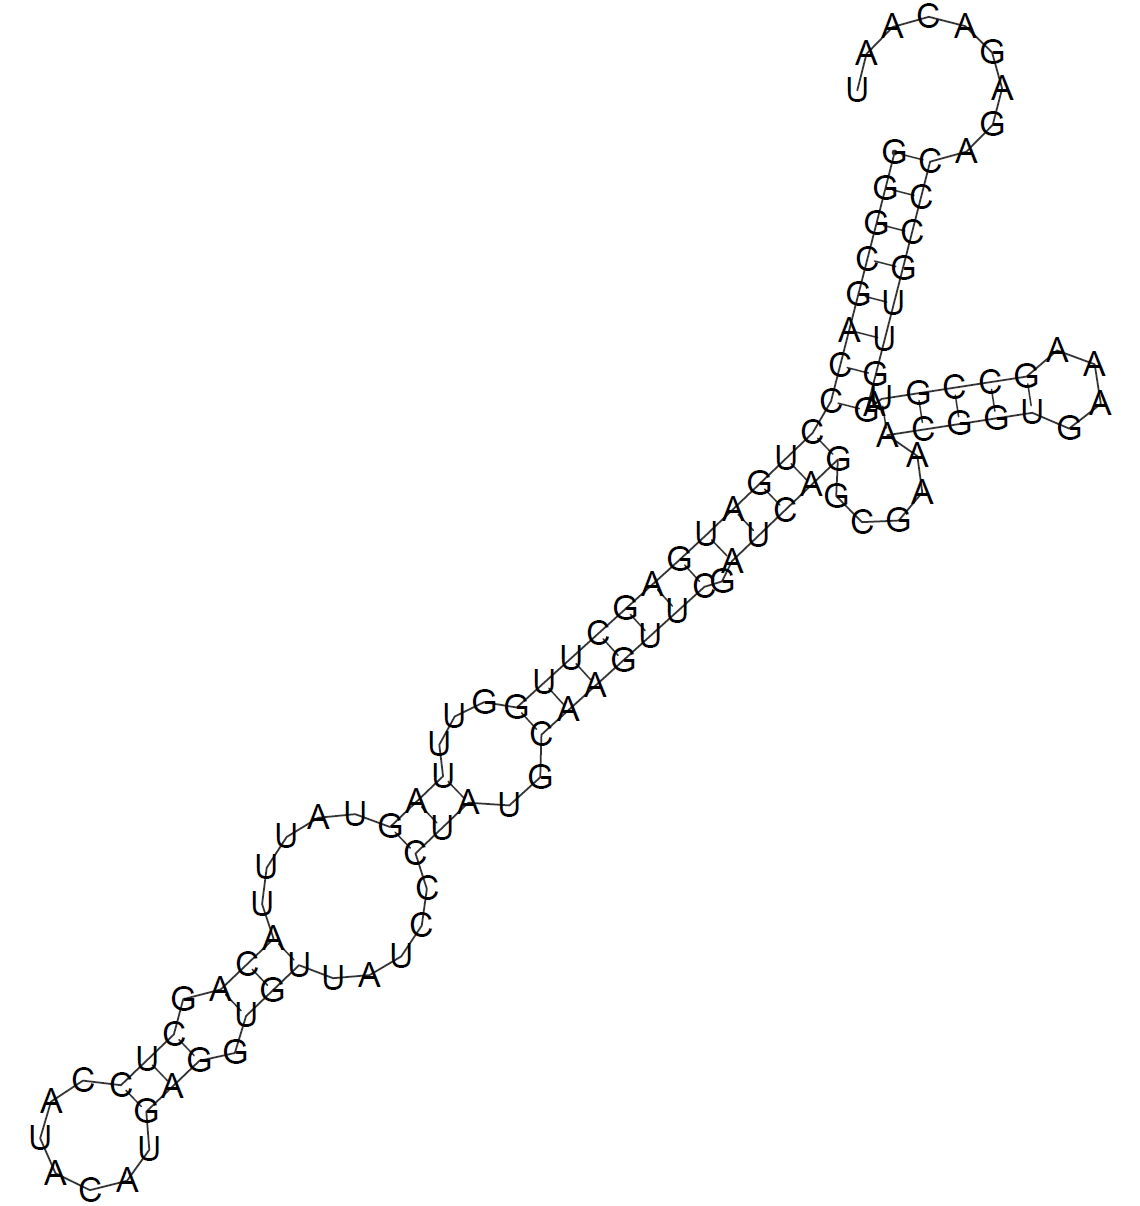

AND-1 OBS1 bound (does not agree with paper)

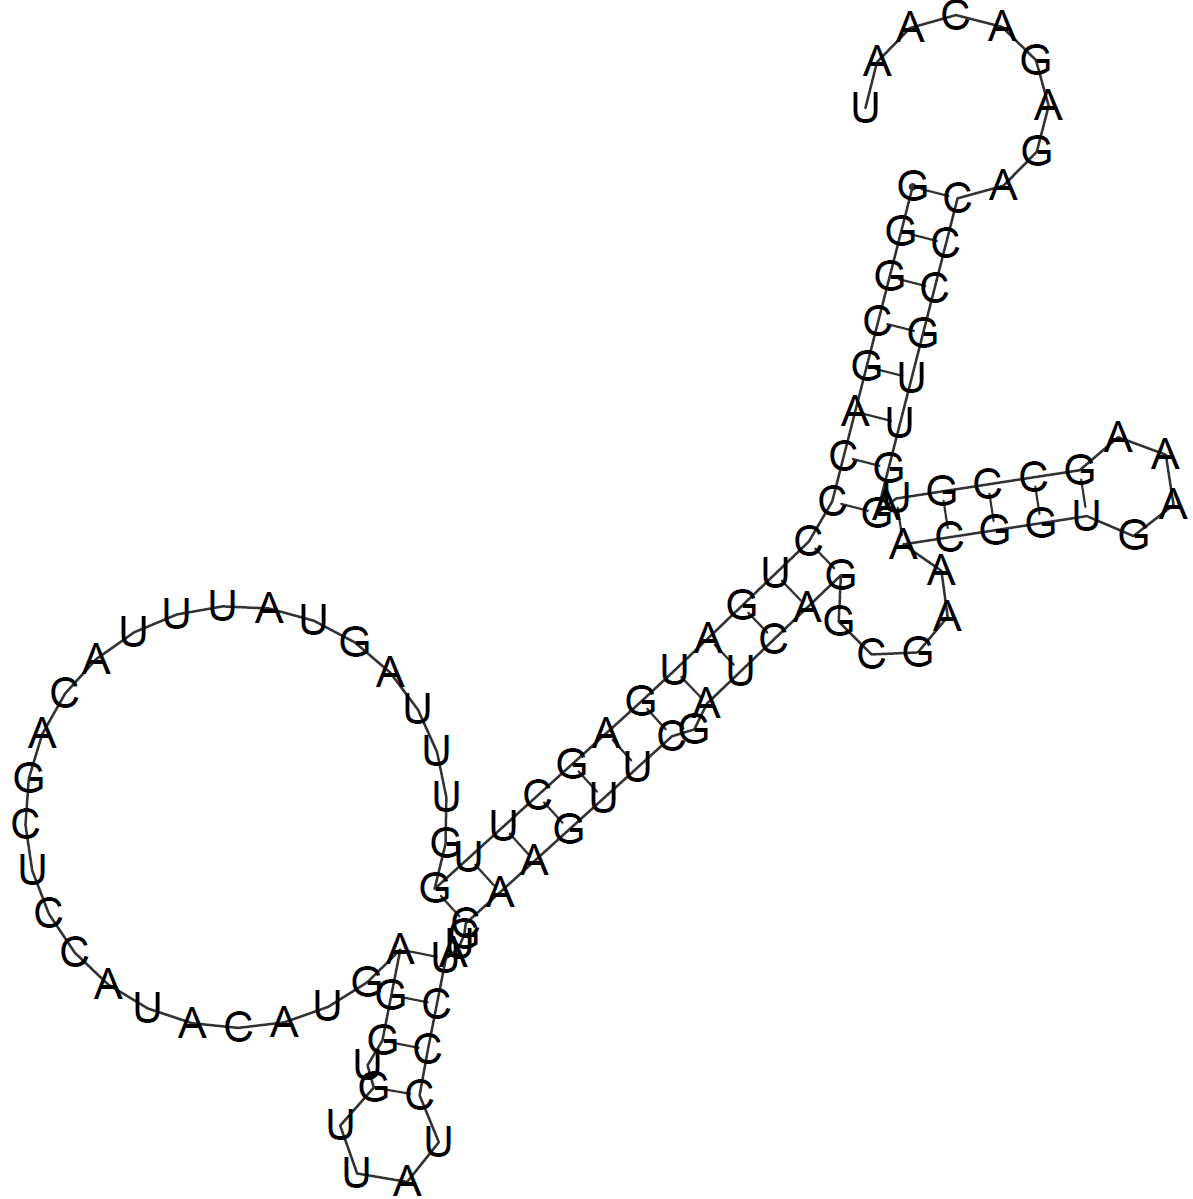

AND-1 OBS2 bound (agrees with paper)

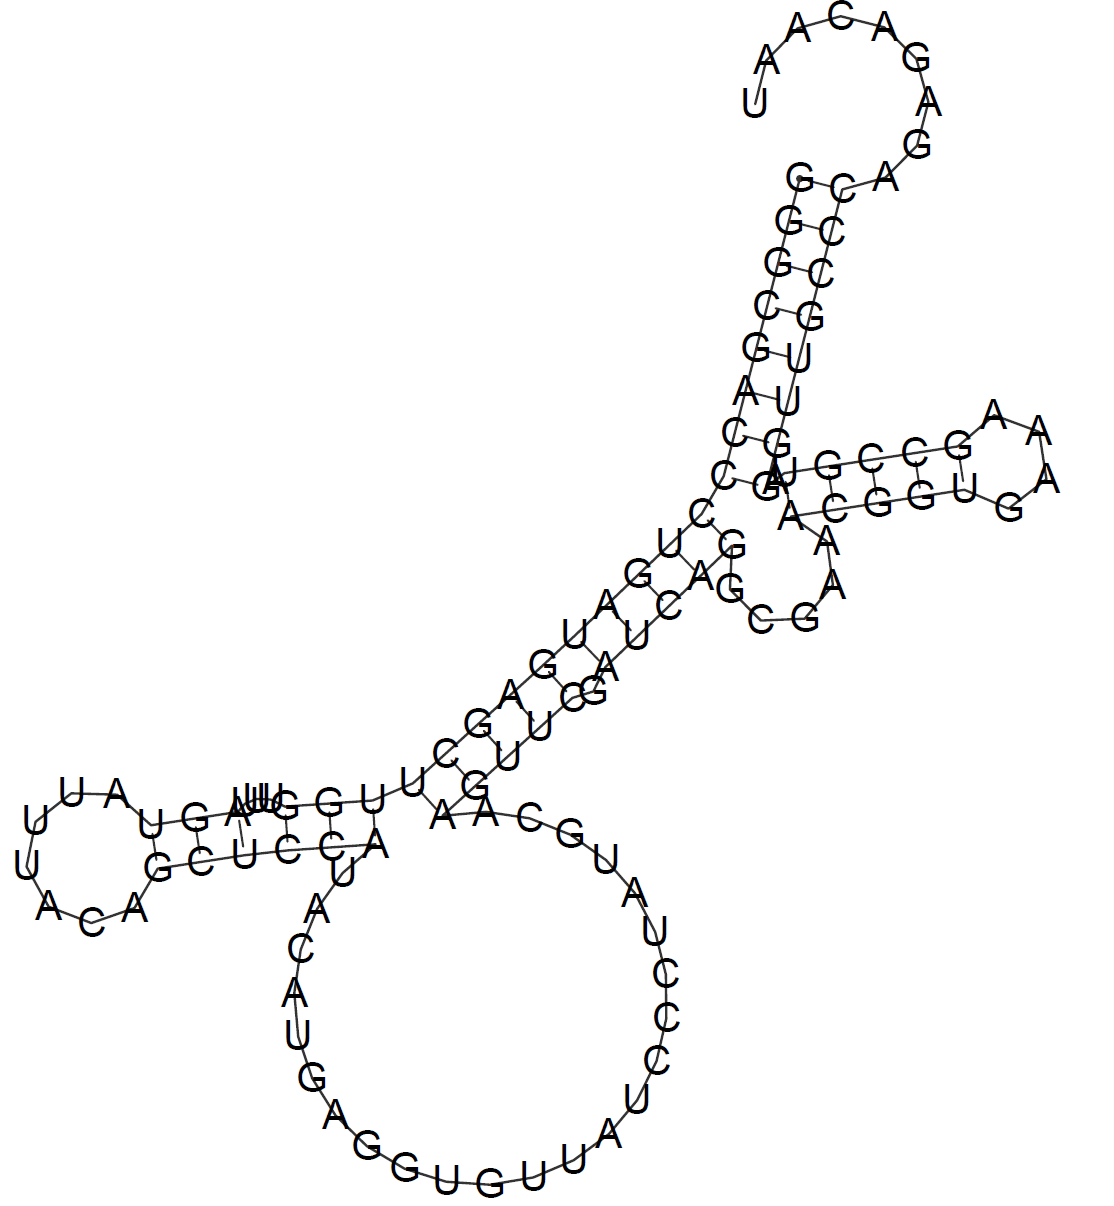

AND-1 OBS1 and OBS2 bound (does not agree with paper)

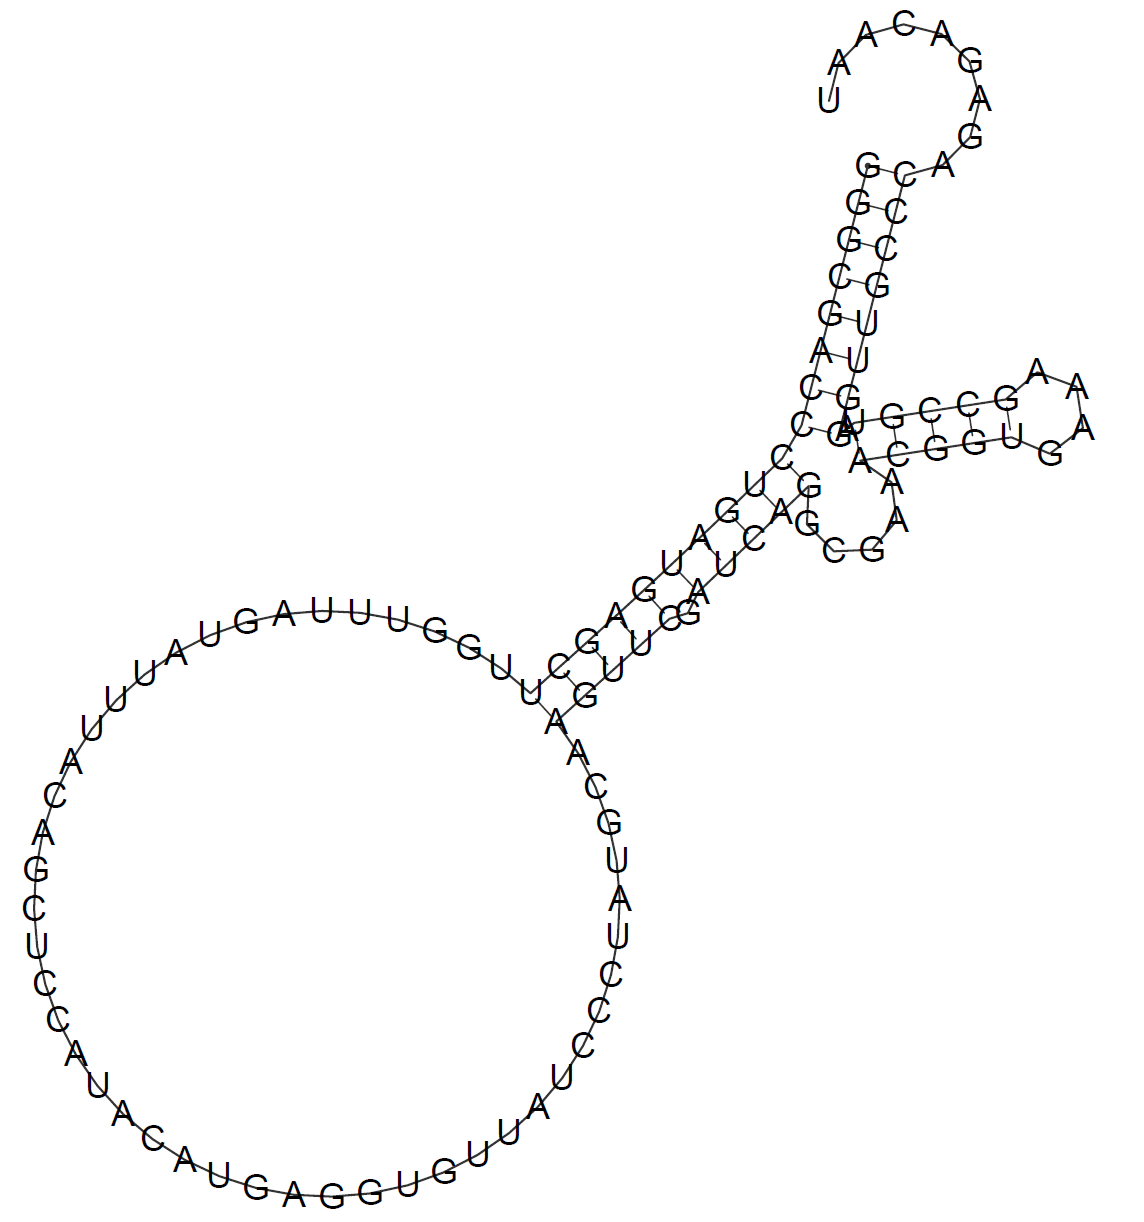

OR-1 unbound (Agrees with paper)

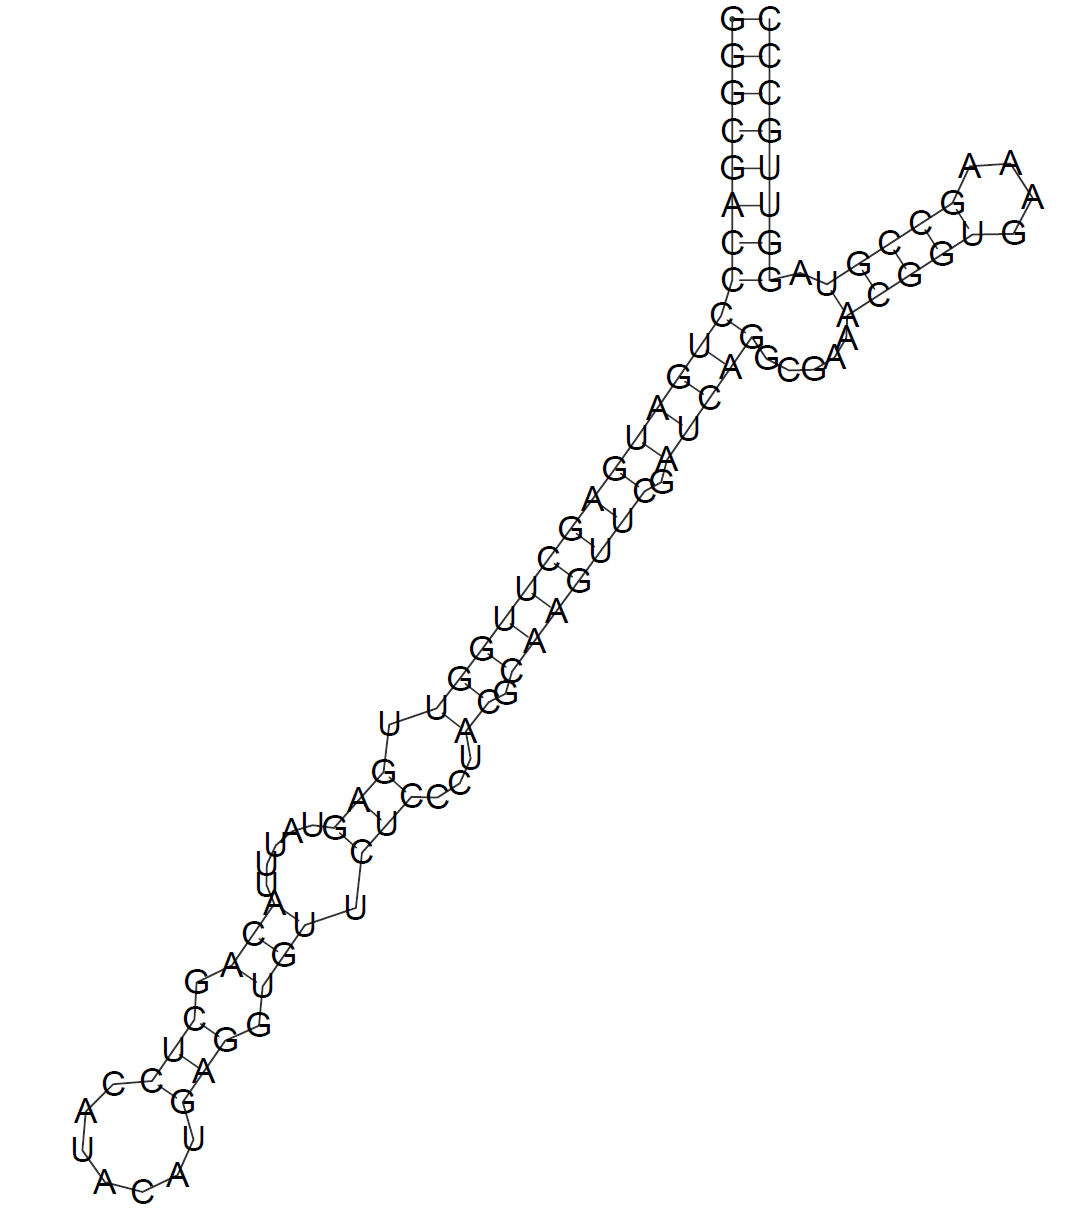

OR-1 OBS1 bound (mostly agrees with paper -- contains the stem double stranded sequence)

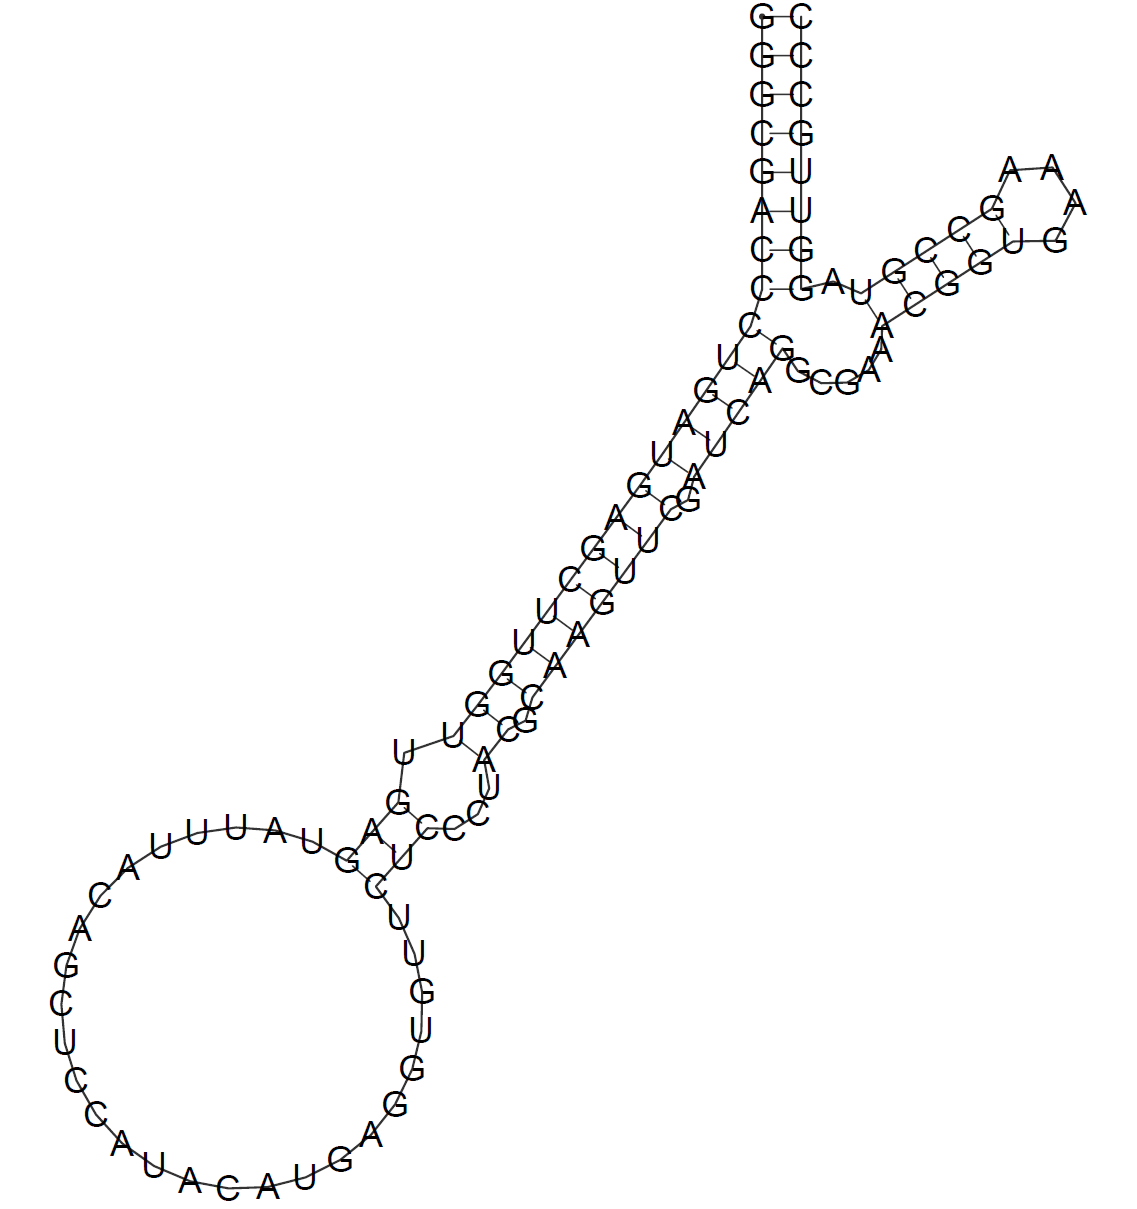

OR-1 OBS2 bound (agrees with paper)

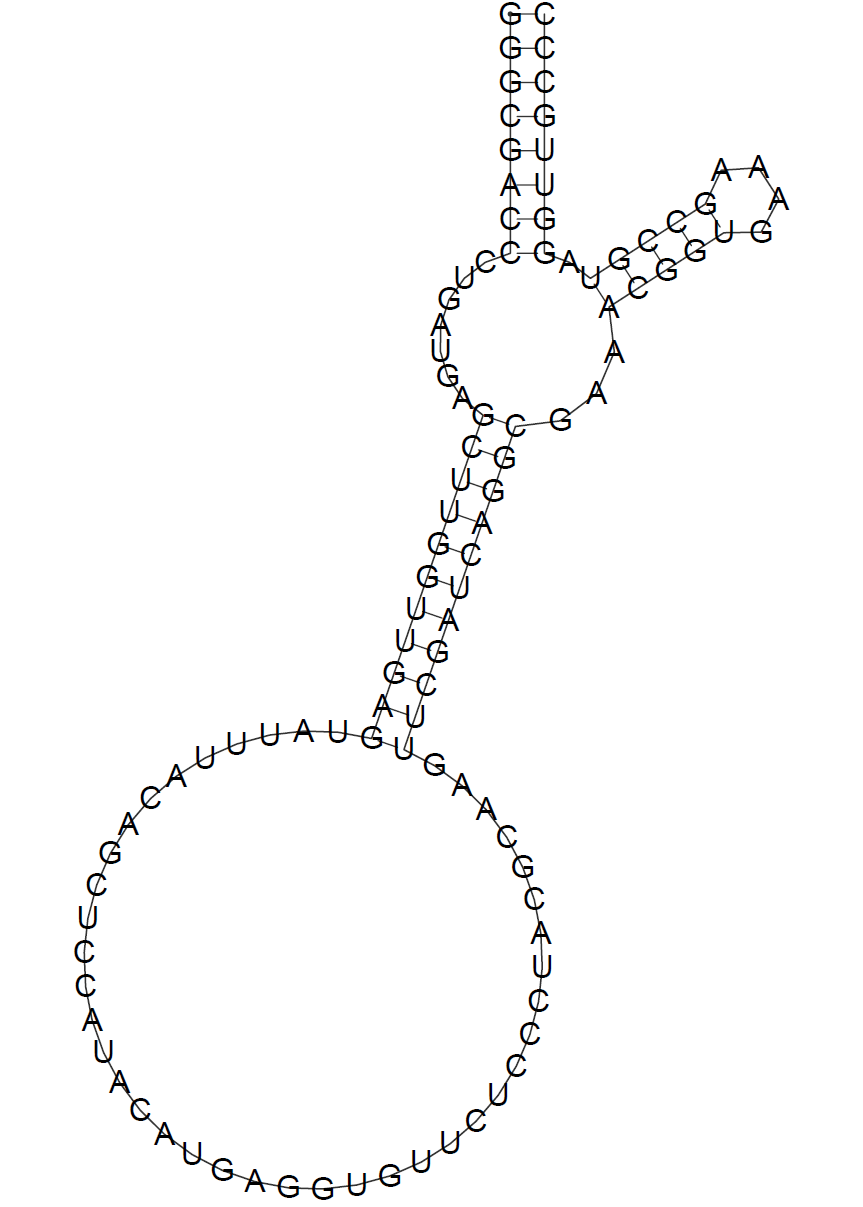

OR-1 OBS1 and OBS2 bound (agrees with paper)

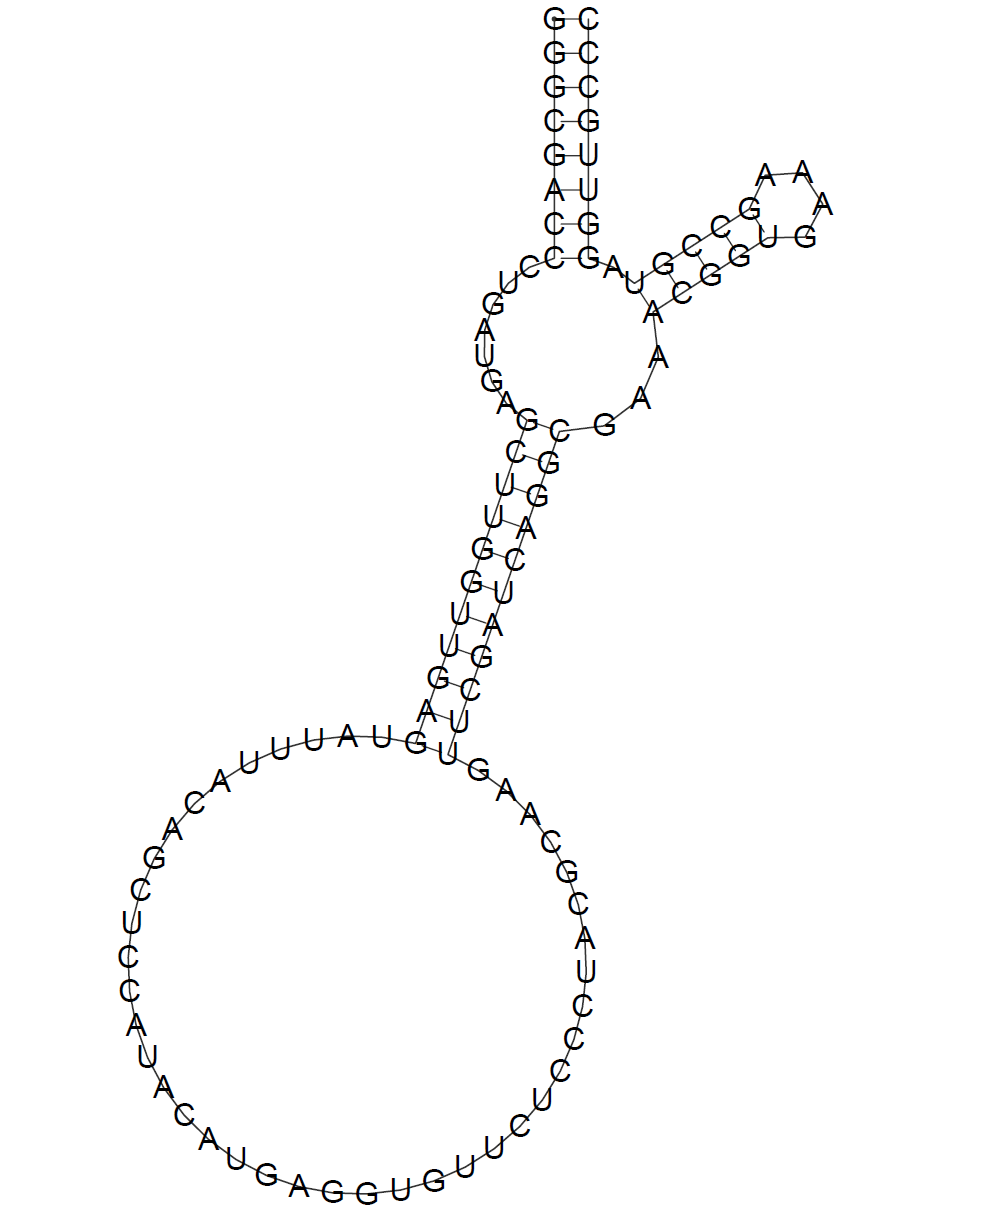